Rami, Nicola Srour (2025)

Title: Amazon Sale report dataset, MLP classification

In [ ]:
# import needed libraries
import pandas as pd
import sklearn.model_selection
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# upload dataset and show all columns
df = pd.read_excel("Amazon Sale Report.xlsx")
pd.set_option('display.max_columns', None)
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [ ]:
# remove columns that are not needed
df = df.drop(['Unnamed: 22' , 'ASIN', 'ship-postal-code', 'Order ID', 'SKU', 'promotion-ids'], axis=1)
# duplicates
df = df.drop_duplicates()
# null
df = df.dropna()
df.head(3)

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,IN,False,Easy Ship
7,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,kurta,S,Shipped,1,INR,399.0,HYDERABAD,TELANGANA,IN,False,Easy Ship
12,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,kurta,XS,Shipped,1,INR,399.0,Amravati.,MAHARASHTRA,IN,False,Easy Ship


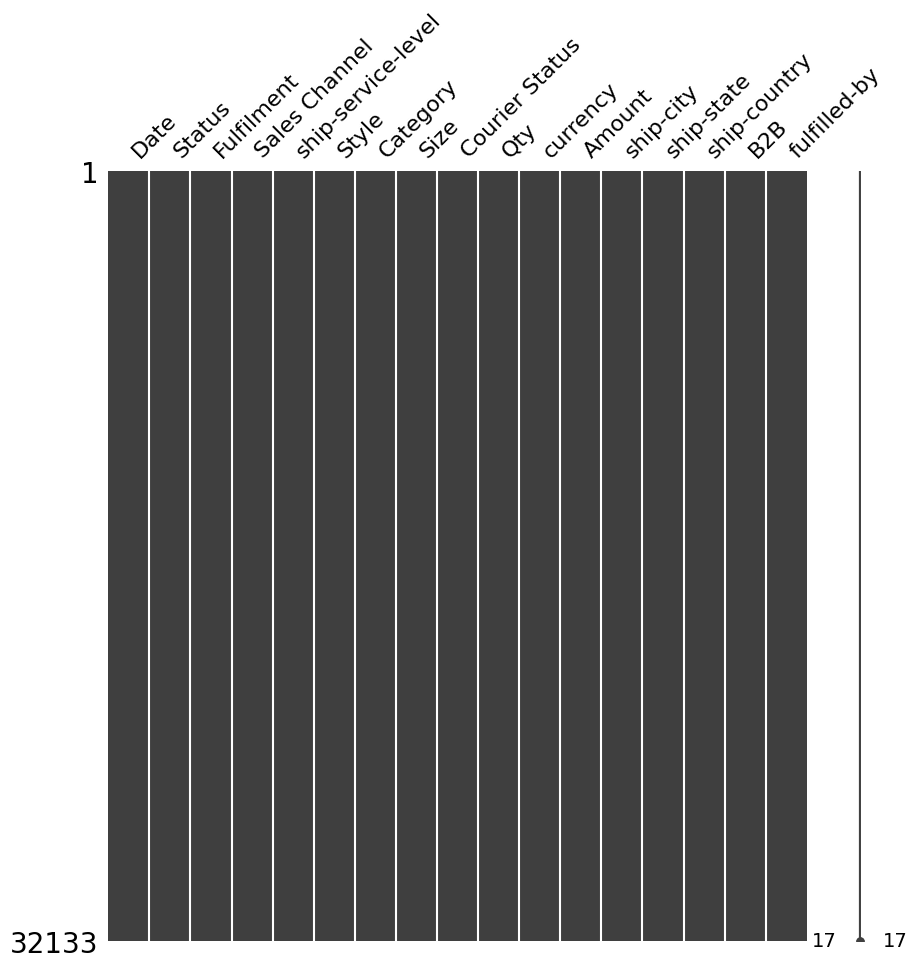

In [ ]:
# make sure no null values exist
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

In [ ]:
# changed date column values to date data
df['Date'] = pd.to_datetime(df['Date'])

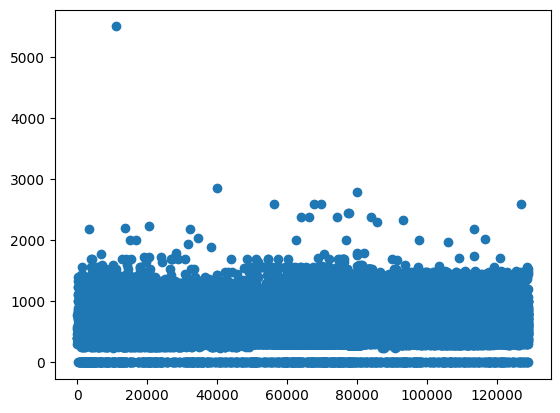

In [ ]:
# use scatter plot to remove outliers

plt.scatter(df.index, df['Amount'])
plt.show()

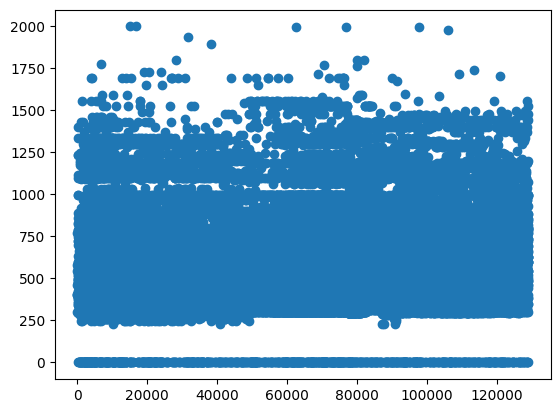

In [ ]:
df = df[df['Amount'] < 2000]
plt.scatter(df.index, df['Amount'])
plt.show()

In [ ]:
#  counting finding unique values in each column with cateogrical values to know which encoding method to use
uniquestatus = df['Status'].nunique()
uniqueFulfilment = df['Fulfilment'].nunique()
uniqueSalesChannel = df.iloc[:,4].nunique()
uniqueshipservicelevel = df['ship-service-level'].nunique()
uniqueStyle = df['Style'].nunique()
uniquecategory = df['Category'].nunique()
uniqueSize = df['Size'].nunique()
uniqueCourierStatus = df['Courier Status'].nunique()
uniquecurrency = df['currency'].nunique()
uniqueshipcity = df['ship-city'].nunique()
uniqueshipstate = df['ship-state'].nunique()
uniquehipcountry= df['ship-country'].nunique()
uniqueb2b = df['B2B'].nunique()
uniquefulfilledby = df['fulfilled-by'].nunique()
print(uniquestatus, uniqueFulfilment, uniqueSalesChannel, uniqueshipservicelevel, uniqueStyle, uniquecategory, uniqueSize, uniqueCourierStatus , uniquecurrency, uniqueshipcity, uniqueshipstate, uniquehipcountry, uniqueb2b, uniquefulfilledby)

10 1 1 1 1080 8 11 2 1 4321 57 1 2 1


In [ ]:
# show statistics of the datasets
df.describe()

,Date,Qty,Amount
count,32111,32111.000000,32111.000000
mean,2022-05-11 10:28:35.075830784,1.003986,648.841954
min,2022-03-31 00:00:00,1.000000,0.000000
25%,2022-04-20 00:00:00,1.000000,458.000000
50%,2022-05-09 00:00:00,1.000000,631.000000
75%,2022-06-01 00:00:00,1.000000,771.000000
max,2022-06-29 00:00:00,4.000000,1999.000000
std,NaN,0.070917,280.790239


In [ ]:
# use label encoder on the features columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Status'] = encoder.fit_transform(df['Status'])
df['Fulfilment'] = encoder.fit_transform(df['Fulfilment'])
df['Sales Channel'] = encoder.fit_transform(df.iloc[:,4])
df['ship-service-level'] = encoder.fit_transform(df['ship-service-level'])
df['Style'] = encoder.fit_transform(df['Style'])
df['Category'] = encoder.fit_transform(df['Category'])
df['Size'] = encoder.fit_transform(df['Size'])
df['Courier Status'] = encoder.fit_transform(df['Courier Status'])
df['currency'] = encoder.fit_transform(df['currency'])
df['ship-city'] = encoder.fit_transform(df['ship-city'])
df['ship-state'] = encoder.fit_transform(df['ship-state'])
df['ship-country'] = encoder.fit_transform(df['ship-country'])
df['B2B'] = encoder.fit_transform(df['B2B'])
df['fulfilled-by'] = encoder.fit_transform(df['fulfilled-by'])
df['Date'] = encoder.fit_transform(df['Date'])
df = df.drop(df.columns[3], axis=1)
df.head(3)

,Date,Status,Fulfilment,ship-service-level,Style,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B,fulfilled-by,Sales Channel
1,30,3,0,0,676,7,0,0,1,0,406.0,387,21,0,0,0,0
7,30,3,0,0,412,7,7,0,1,0,399.0,1392,47,0,0,0,0
12,30,3,0,0,412,7,9,0,1,0,399.0,197,26,0,0,0,0


In [ ]:
# see types of columns
df.dtypes

,0
Date,int64
Status,int64
Fulfilment,int64
ship-service-level,int64
Style,int64
Category,int64
Size,int64
Courier Status,int64
Qty,int64
currency,int64


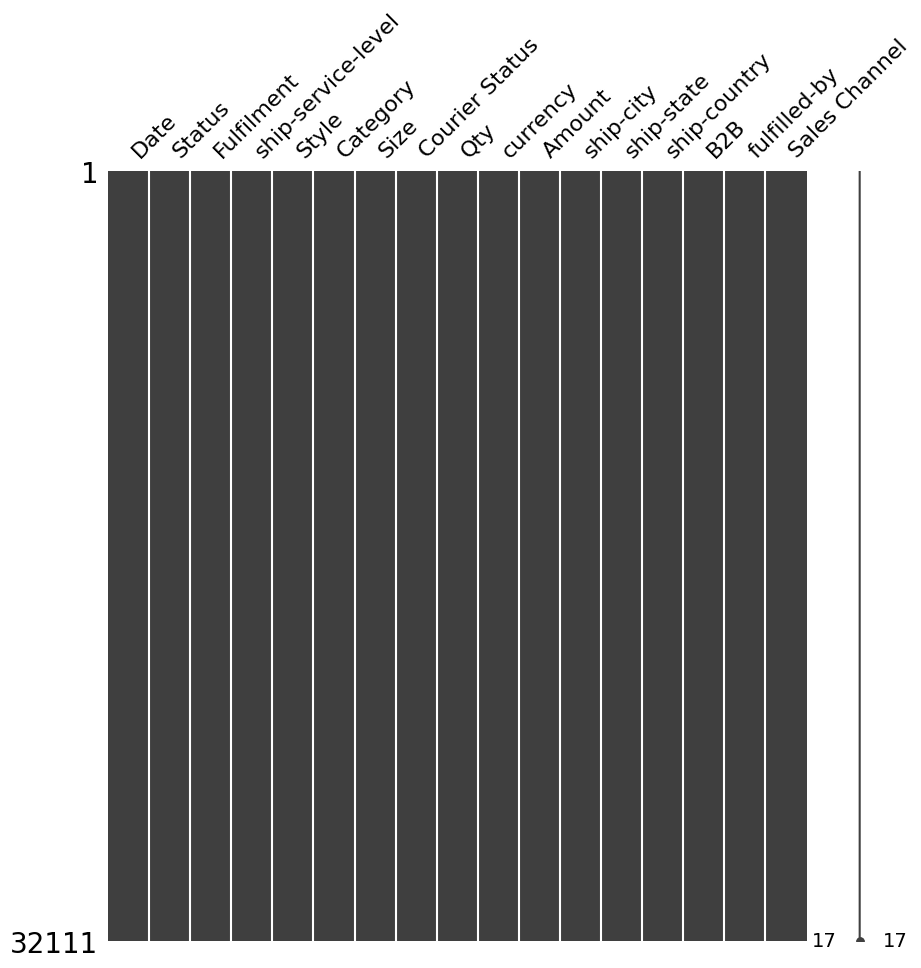

In [ ]:
# make sure again no null values exist
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

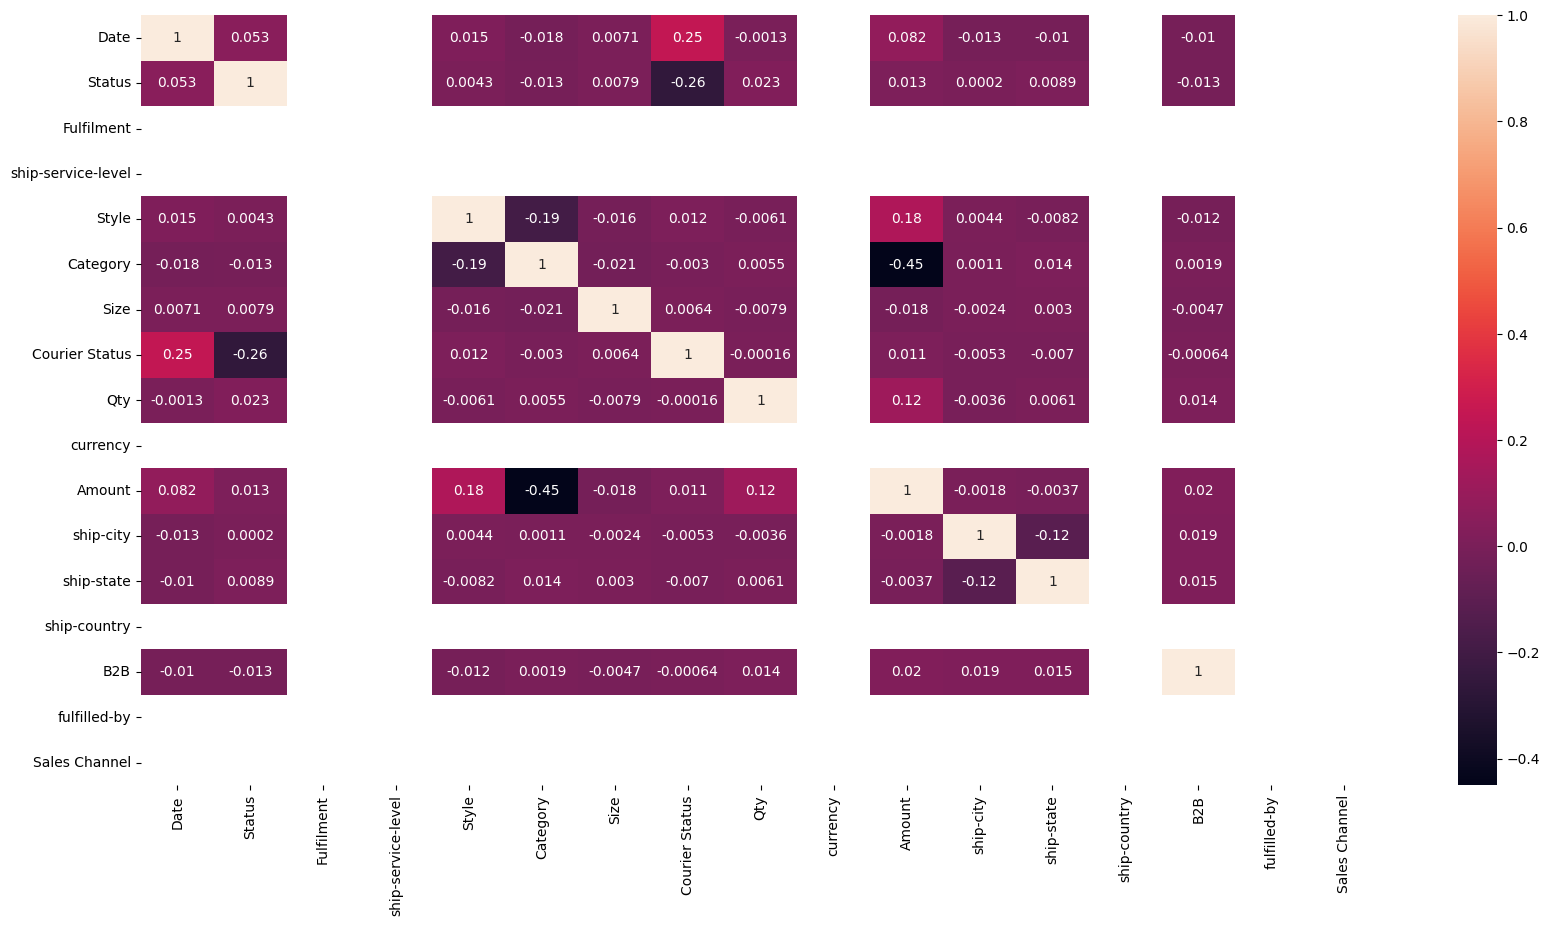

In [ ]:
# find correlation matrix
plt.figure(figsize=(20,10))
corrmatrix =  df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [ ]:
# split the dataset, build, train and test the machine learning models
x = df.drop(['Category'], axis=1)
y = df['Category']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y)
print("df:", df.shape)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

df: (32111, 17)
x_train: (24083, 16)
y_train: (24083,)
x_test: (8028, 16)
y_test: (8028,)


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
y_predicted = clf.predict(x_test)
acc = sklearn.metrics.accuracy_score(y_test, y_predicted)
print(acc)

0.37244643746885897


In [ ]:
ypredprob = clf.predict_proba(x_test)
roc = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovo')
roc2 = sklearn.metrics.roc_auc_score(y_test,ypredprob, multi_class='ovr')
print(roc, roc2)

0.5 0.5


Dataset reference:
ANil, (2022), Summary, Data.world, Available at: https://data.world/anilsharma87/sales, (Accessed : 04/04/2025)